# Week9 - Ensemble Assignment

* Train-test split
* Train a random forest model
* Try bagging & boosting algorithms
* Evaluate the models
* Explain findings

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

def generate_dataset():   
    X, y = make_circles(n_samples=1000,noise=0.1, random_state=42)
    df1 = pd.DataFrame(X)
    df1['y'] = y
    
    X1, y1 = make_moons(n_samples=1000, noise=0.1, random_state=42)
    df2 = pd.DataFrame(X1)
    df2['y'] = y
    
    df = pd.concat([df1, df2])
    df = df.sample(frac=1).reset_index(drop=True)
    return df[[0,1]].to_numpy(), df.y

In [31]:
X, y = generate_dataset()

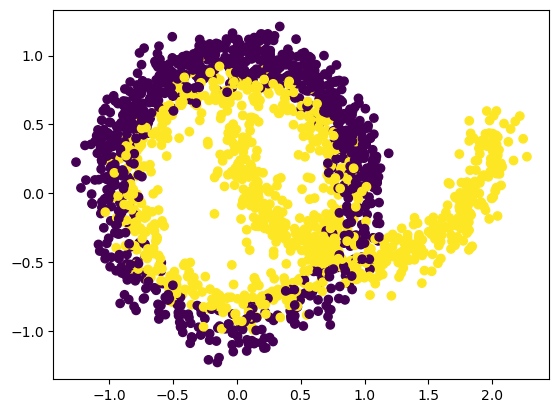

In [32]:
plt.scatter(X[:,0], X[:,1],c=y)

In [33]:
y.value_counts()

y
1    1000
0    1000
Name: count, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
# bagging model
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)

/Users/palak/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [37]:
# boost model
boosting_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)
boosting_model.fit(X_train, y_train)

/Users/palak/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100, random_state=42)

In [38]:
models = {'Random Forest': rf_model, 'Bagging': bagging_model, 'Boosting': boosting_model}
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Confusion Matrix:\n{conf_matrix}\n")

Random Forest Accuracy: 0.84
Random Forest Confusion Matrix:
[[173  34]
 [ 30 163]]

Bagging Accuracy: 0.84
Bagging Confusion Matrix:
[[173  34]
 [ 30 163]]

Boosting Accuracy: 0.84
Boosting Confusion Matrix:
[[175  32]
 [ 32 161]]



Random Forest has the best accuracy, whereas Bagging also shows almost similar accuracy but has a slight increase in the false as compared to random forest.

In [39]:
import pandas as pd
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC

# defining circles and moons dataset
def generate_dataset_circles():
    X, y = make_circles(n_samples=1000, noise=0.1, random_state=42)
    return X, y

def generate_dataset_moons():
    X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
    return X, y

# training models and evaluating them
def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
    bagging_model.fit(X_train, y_train)

    boosting_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)
    boosting_model.fit(X_train, y_train)

    svm_model = SVC(random_state=42)
    svm_model.fit(X_train, y_train)

    models = {
        'Random Forest': rf_model,
        'Bagging': bagging_model,
        'Boosting': boosting_model,
        'SVM': svm_model
    }

    # evaluating all models
    for name, model in models.items():
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        print(f"{name} Accuracy: {accuracy:.2f}")
        print(f"{name} Confusion Matrix:\n{conf_matrix}\n")

X_circles, y_circles = generate_dataset_circles()
X_moons, y_moons = generate_dataset_moons()

# printing circles results
print("Evaluating models on the Circles dataset:")
train_and_evaluate(X_circles, y_circles)

# printing moons results
print("Evaluating models on the Moons dataset:")
train_and_evaluate(X_moons, y_moons)

Evaluating models on the Circles dataset:


/Users/palak/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/palak/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Random Forest Accuracy: 0.73
Random Forest Confusion Matrix:
[[68 32]
 [22 78]]

Bagging Accuracy: 0.71
Bagging Confusion Matrix:
[[66 34]
 [23 77]]

Boosting Accuracy: 0.72
Boosting Confusion Matrix:
[[68 32]
 [23 77]]

SVM Accuracy: 0.74
SVM Confusion Matrix:
[[71 29]
 [22 78]]

Evaluating models on the Moons dataset:


/Users/palak/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/palak/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Random Forest Accuracy: 1.00
Random Forest Confusion Matrix:
[[100   0]
 [  0 100]]

Bagging Accuracy: 1.00
Bagging Confusion Matrix:
[[100   0]
 [  0 100]]

Boosting Accuracy: 0.99
Boosting Confusion Matrix:
[[100   0]
 [  2  98]]

SVM Accuracy: 1.00
SVM Confusion Matrix:
[[100   0]
 [  0 100]]



Circles poses some challenge to the models, leading to a best accuracy of 74.5% with the SVM model
whereas, all models for moons dataset achieved perfect classification with an accuracy of 100%, which could be because the datapoints in moon are easily separable.